In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

# Specify the directory containing the CSV files
csv_directory = r'C:\Users\david\fall2024\capstone\SHAZAM-CAPSTONE\fj396zz8014'

# Use glob to find all CSV files in the directory
file_paths = glob.glob(os.path.join(csv_directory, '*.csv'))
file_paths.sort(key=lambda x: int(os.path.basename(x).split('song')[1].split('.csv')[0]))

print(file_paths)

['C:\\Users\\david\\fall2024\\capstone\\SHAZAM-CAPSTONE\\fj396zz8014\\song01.csv', 'C:\\Users\\david\\fall2024\\capstone\\SHAZAM-CAPSTONE\\fj396zz8014\\song02.csv', 'C:\\Users\\david\\fall2024\\capstone\\SHAZAM-CAPSTONE\\fj396zz8014\\song03.csv', 'C:\\Users\\david\\fall2024\\capstone\\SHAZAM-CAPSTONE\\fj396zz8014\\song04.csv', 'C:\\Users\\david\\fall2024\\capstone\\SHAZAM-CAPSTONE\\fj396zz8014\\song05.csv', 'C:\\Users\\david\\fall2024\\capstone\\SHAZAM-CAPSTONE\\fj396zz8014\\song06.csv', 'C:\\Users\\david\\fall2024\\capstone\\SHAZAM-CAPSTONE\\fj396zz8014\\song07.csv', 'C:\\Users\\david\\fall2024\\capstone\\SHAZAM-CAPSTONE\\fj396zz8014\\song08.csv', 'C:\\Users\\david\\fall2024\\capstone\\SHAZAM-CAPSTONE\\fj396zz8014\\song09.csv', 'C:\\Users\\david\\fall2024\\capstone\\SHAZAM-CAPSTONE\\fj396zz8014\\song10.csv', 'C:\\Users\\david\\fall2024\\capstone\\SHAZAM-CAPSTONE\\fj396zz8014\\song11.csv', 'C:\\Users\\david\\fall2024\\capstone\\SHAZAM-CAPSTONE\\fj396zz8014\\song12.csv', 'C:\\Users\\dav

In [2]:
#check if file is read and display
df = pd.read_csv(file_paths[0])
print(df.head())
print(df.columns)
print(df.info())

     Offset        Date
0  164.7340  2014-11-10
1   19.3951  2014-11-10
2  123.8470  2014-11-10
3   96.0996  2014-11-10
4   83.0272  2014-11-10
Index(['Offset', 'Date'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13855245 entries, 0 to 13855244
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Offset  float64
 1   Date    object 
dtypes: float64(1), object(1)
memory usage: 211.4+ MB
None


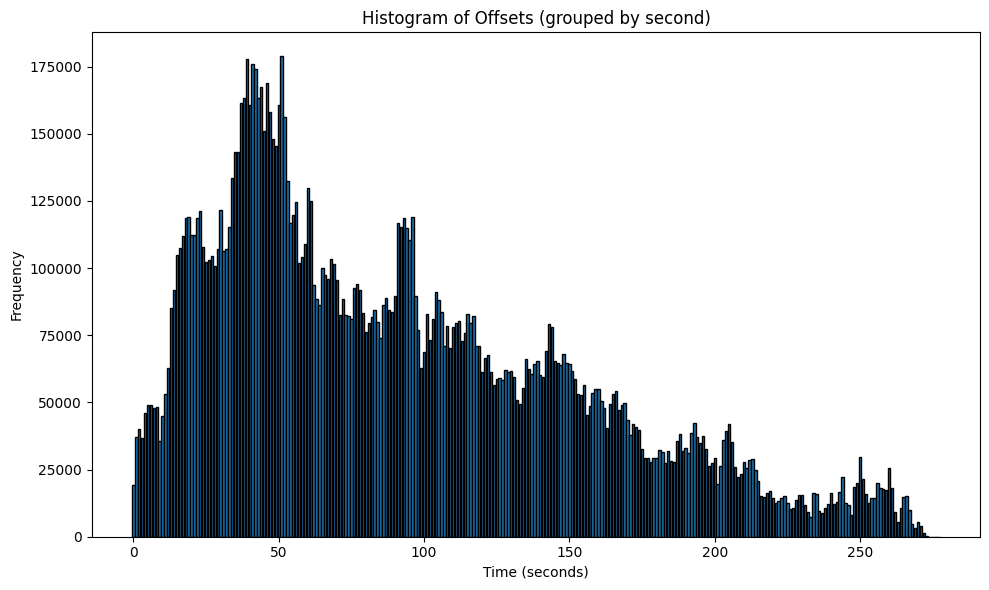

In [5]:
df = pd.read_csv(file_paths[1])
df['Rounded_Offset'] = df['Offset'].round(0).astype(int)
offset_counts = df['Rounded_Offset'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.bar(offset_counts.index, offset_counts.values, width=0.8, edgecolor='black')

# Set plot labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Offsets (grouped by second)')
plt.tight_layout()

# Show the plot
plt.show()

In [3]:
song_titles = ['Uptown Funk', 'Thinking Out Loud', 'See You Again', 
               'Trap Queen', 'Sugar', 'Shut Up and Dance', 'Blank Space',
               'Watch Me', 'Earned It', 'The Hills', 'Cheerleader',
               'Can\'t Feel My Face', 'Love Me Like You Do',
               'Take Me to Church', 'Lean On', 'Want to Want Me', 
               'Shake If Off', 'Where are You Now', 'Fight Song', '679']


In [ ]:
# Replace with your path
histograms_folder = r'C:\Users\david\fall2024\capstone\SHAZAM-CAPSTONE\histograms\histograms_vis'
histogram_data_folder = r'C:\Users\david\fall2024\capstone\SHAZAM-CAPSTONE\histograms\histogram_data'      

for i, file_path in enumerate(file_paths):
    df = pd.read_csv(file_path, nrows=1000000)
    df['Rounded_Offset'] = df['Offset'].round(0).astype(int)
    offset_counts = df['Rounded_Offset'].value_counts().sort_index()
    plt.figure(figsize=(10,6))
    plt.bar(offset_counts.index, offset_counts.values, width=0.8, edgecolor='black')

    # Set plot labels and title
    plt.xlabel('Time (seconds)')
    plt.ylabel('Frequency')
    plt.title(song_titles[i])
    plt.tight_layout()

    # Save histogram
    histogram_file = os.path.join(histograms_folder, f"{os.path.basename(file_path).replace('.csv', '')}_histogram.png")
    plt.savefig(histogram_file)

    # Save histogram data
    histogram_data = pd.DataFrame({
        'Second': offset_counts.index,
        'Count': offset_counts.values
    })
    data_file = os.path.join(histogram_data_folder, f"{os.path.basename(file_path).replace('.csv', '')}_histogram_data.csv")
    histogram_data.to_csv(data_file, index=False)

In [2]:
# remade histogram for smaller bin size to 0.5 secs

histogram_data_folder = r'C:\Users\david\fall2024\capstone\SHAZAM-CAPSTONE\histograms\hist_data'      

for i, file_path in enumerate(file_paths):
    df = pd.read_csv(file_path, nrows=1000000)
    # Round to the nearest 0.5 seconds
    df['Rounded_Offset'] = (df['Offset'] / 0.5).round() * 0.5
    offset_counts = df['Rounded_Offset'].value_counts().sort_index()

    # Save histogram data with 0.5-second bins
    histogram_data = pd.DataFrame({
        'Second': offset_counts.index,
        'Count': offset_counts.values
    })
    data_file = os.path.join(histogram_data_folder, f"{os.path.basename(file_path).replace('.csv', '')}_histogram_data.csv")
    histogram_data.to_csv(data_file, index=False)

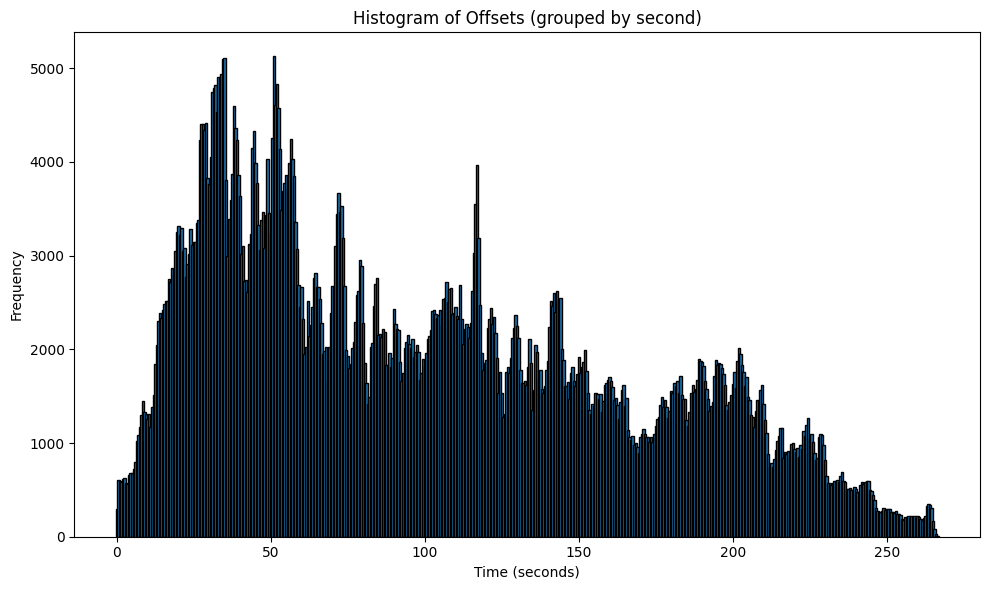

In [5]:
df = pd.read_csv(r"C:\Users\david\fall2024\capstone\SHAZAM-CAPSTONE\histograms\hist_data\song01_histogram_data.csv")
plt.figure(figsize=(10,6))
plt.bar(df['Second'], df['Count'], width=0.8, edgecolor='black')

# Set plot labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Offsets (grouped by second)')
plt.tight_layout()

# Show the plot
plt.show()